In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch
from matplotlib import rcParams
import seaborn as sns

plt.style.use('seaborn-talk')
sns.set_theme(style="whitegrid")
rcParams['figure.dpi'] = 300

In [17]:
runs_gauss_norm = "^(22[3-9]|23[0-1])" #"^(16[5-8]|171|174|179|18[0-1])"
runs_gauss_k = "^(23[2-9]|240)" #"^(19[8-9]|20[0-9]|21[0-2])"
runs_linear_norm = "^(21[4-9]|22[0-2])" #"^(182|185|188|19[1-6])"
runs_linear_k = "^(24[1-9])"

api = wandb.Api()
runs = api.runs(
    path="sisaklsanyo/mi",
    filters={"display_name": {"$regex": runs_gauss_k}}
)

In [18]:
#print(next(runs).history())
True_MI_gauss10 = 7.793554
True_MI_linear10 = 8.108256
#True_MI_linear10 = 46.101702

In [19]:
run_dict = {}
for run in runs:
    try:
        param_dict = {
            'Method.k': run.config['Method.k'],
            'Method.p_norm': run.config['Method.p_norm'],
            'Method.method_name': run.config['Method.method_name']
        }
        run_dict[run.display_name] = (run.history()["MI"][1:], param_dict)
    except KeyError:
        pass

In [5]:
for key, value in run_dict.items():
    print(key)
    print(value)
    print('\n')

222-KSG2_linear
(1    3.141609
2    3.768158
3    4.388041
4    4.919726
5    5.451599
Name: MI, dtype: float64, {'Method.k': 1, 'Method.p_norm': 1, 'Method.method_name': 'KSG2'})


221-KSG2_linear
(1    2.575715
2    3.481824
3    4.284636
4    4.818626
5    5.375804
Name: MI, dtype: float64, {'Method.k': 1, 'Method.p_norm': 2, 'Method.method_name': 'KSG2'})


220-KSG2_linear
(1    2.775254
2    3.522838
3    4.274190
4    4.758139
5    5.321313
Name: MI, dtype: float64, {'Method.k': 1, 'Method.p_norm': 'inf', 'Method.method_name': 'KSG2'})


219-KSG1_linear
(1    2.048063
2    2.763426
3    3.422546
4    3.917824
5    4.413410
Name: MI, dtype: float64, {'Method.k': 1, 'Method.p_norm': 1, 'Method.method_name': 'KSG1'})


218-KSG1_linear
(1    1.944756
2    2.901242
3    3.635418
4    4.090379
5    4.578466
Name: MI, dtype: float64, {'Method.k': 1, 'Method.p_norm': 2, 'Method.method_name': 'KSG1'})


217-KSG1_linear
(1    1.833757
2    2.648843
3    3.325804
4    3.756213
5    4.280147

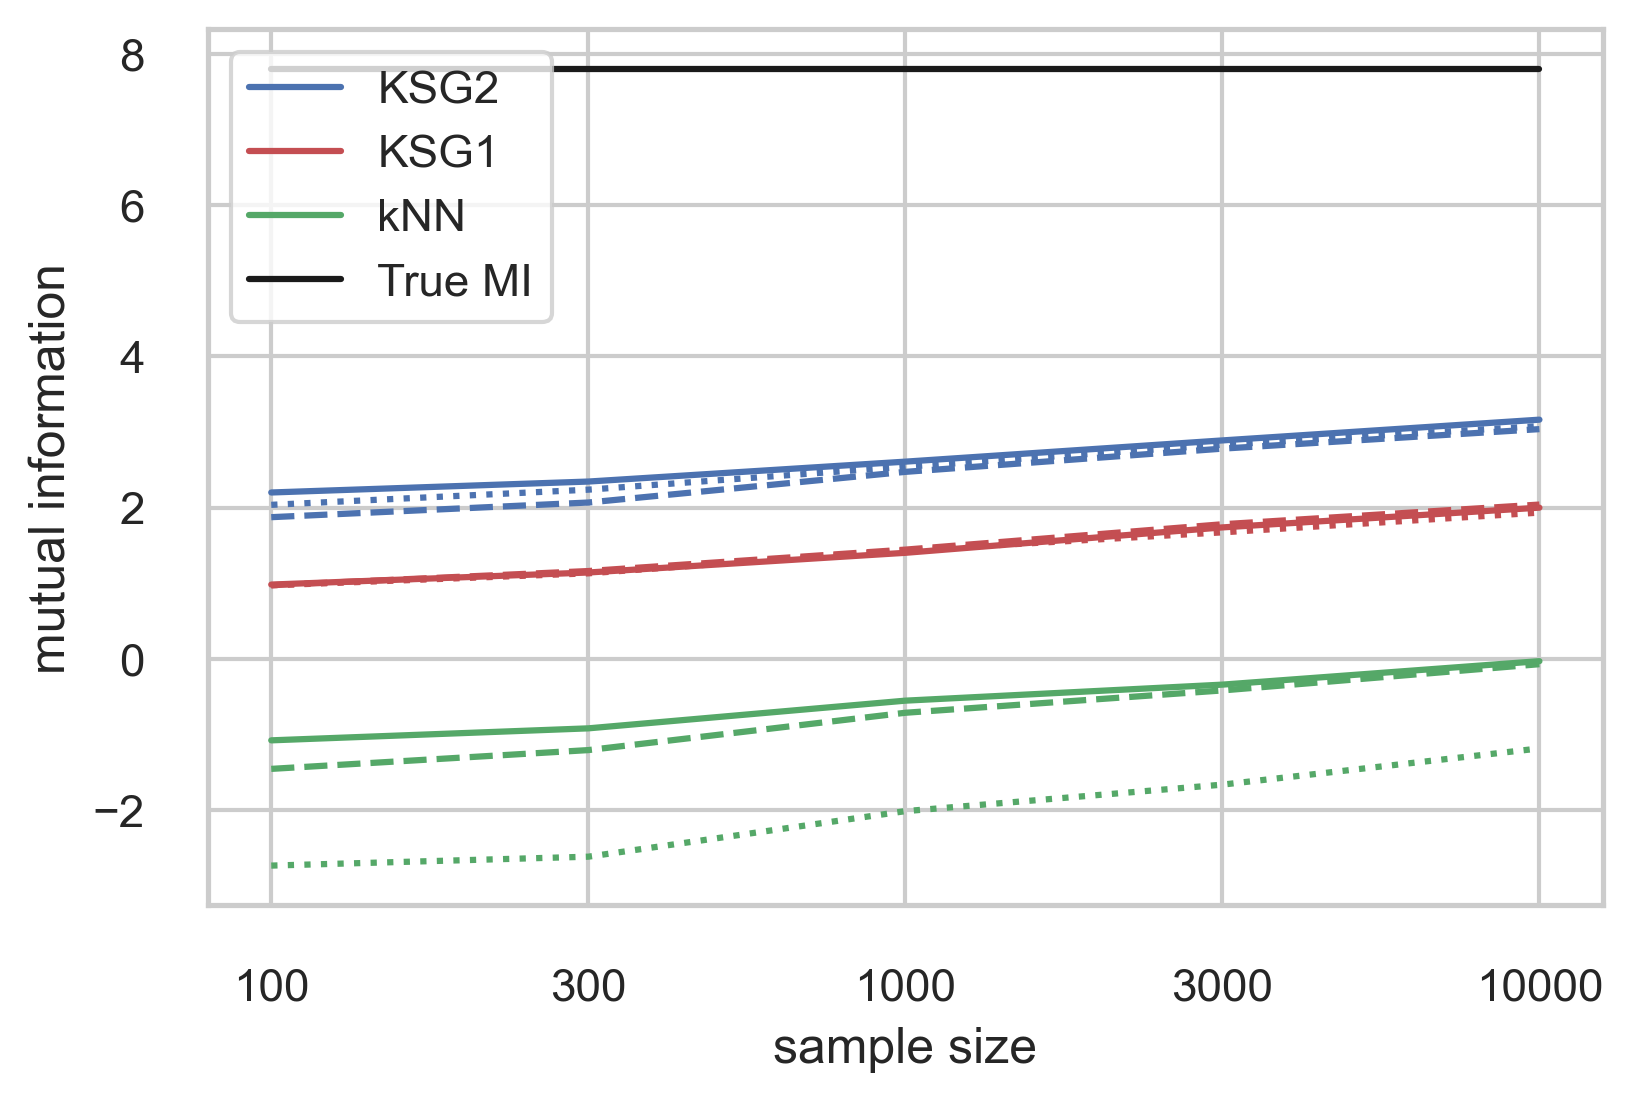

In [16]:
True_MI = True_MI_gauss10
name2clr = {'kNN': 'g', 'KSG1': 'r', 'KSG2': 'b'}
norm2line = {1: '', 2: '--', 'inf': ':'}
labeldict = {'g': 'kNN', 'r': 'KSG1', 'b': 'KSG2',
             'g--': '', 'r--': '', 'b--': '',
             'g:': '', 'r:': '', 'b:': ''}
x_axis = ['100', '300', '1000', '3000', '10000']
save = True

plt.figure(figsize=(6,4))
for key, run in run_dict.items():
    str1 = name2clr[run[1]['Method.method_name']]
    str2 = norm2line[run_dict[key][1]['Method.p_norm']]
    plt.plot(x_axis, run[0], str1+str2, label=labeldict[str1+str2])
plt.plot(x_axis, [True_MI]*5, 'k', label="True MI")
    
plt.xlabel('sample size')
plt.ylabel('mutual information')
plt.gcf().subplots_adjust(bottom=0.15)

#kNNInfo = pch.Patch(color="green", label="kNN")
#KSG1Info = pch.Patch(color="red", label="KSG1")
#KSG2Info = pch.Patch(color="blue", label="KSG2")
TrueMIInfo = pch.Patch(color="black", label="True MI")
plt.legend(#handles=[kNNInfo, KSG1Info, KSG2Info, TrueMIInfo],
           loc="upper left")
    
if save:
    plt.savefig('gauss_10dim_pnorms')
plt.show()

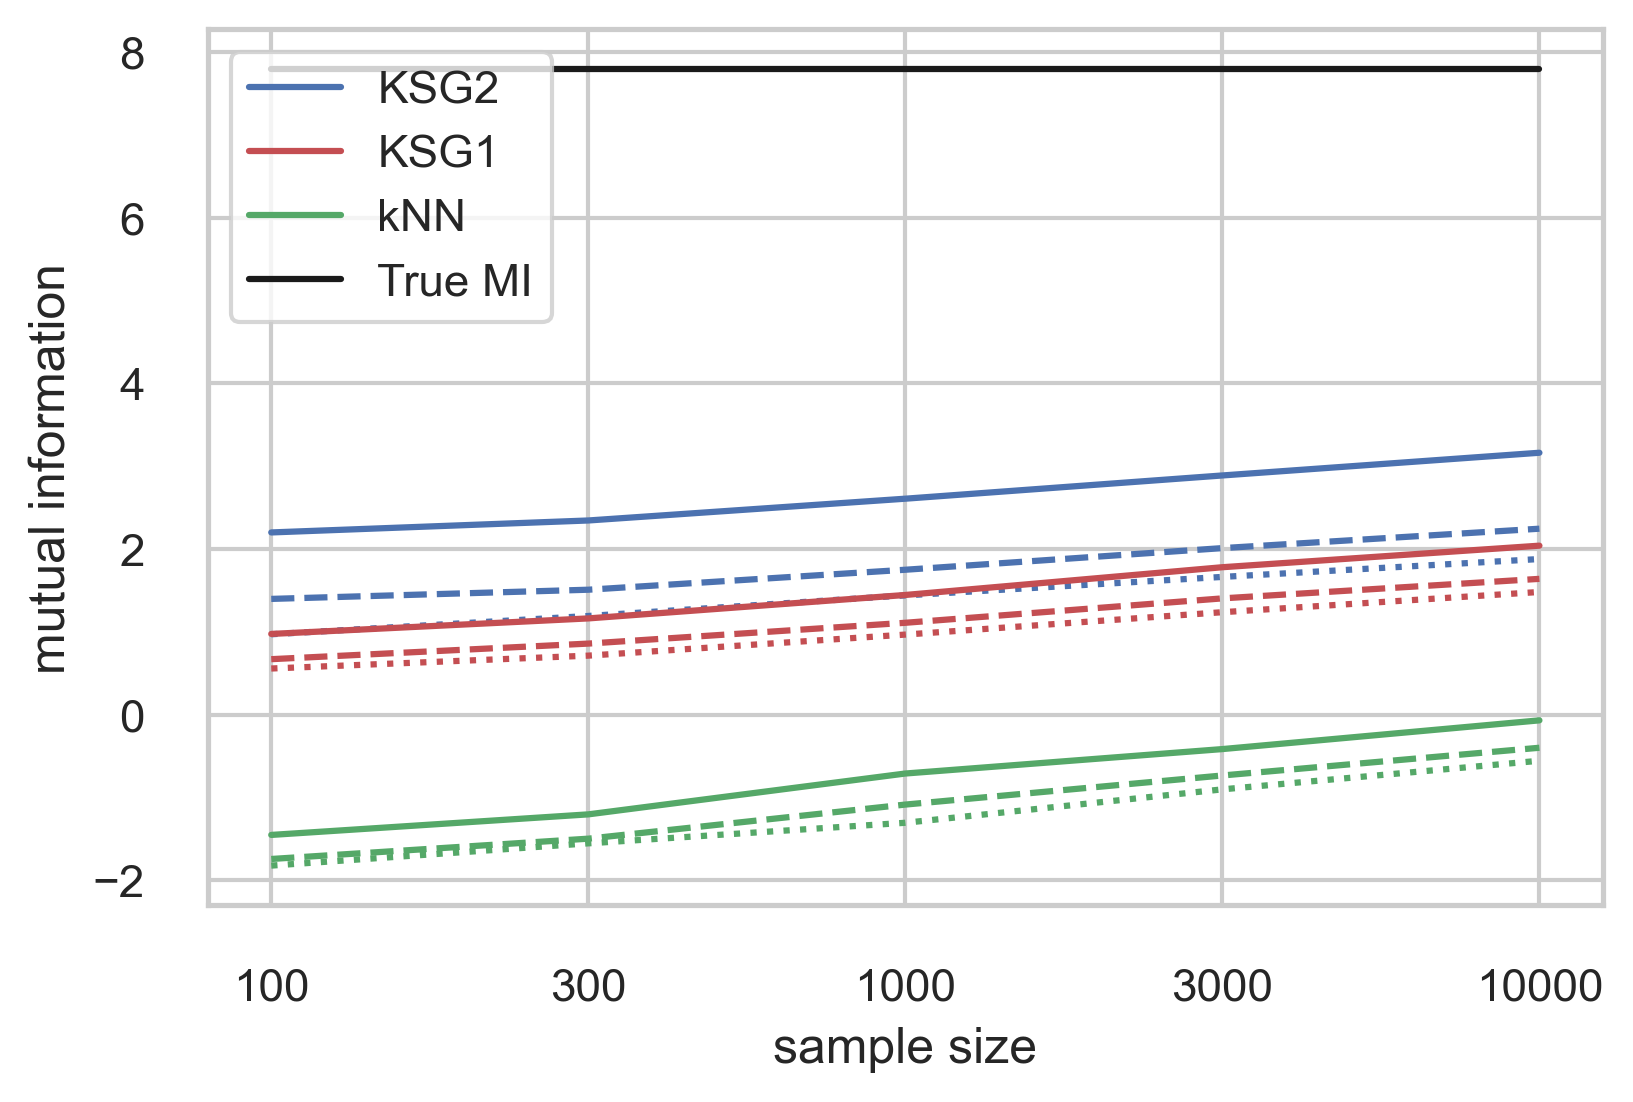

In [20]:
True_MI = True_MI_gauss10
name2clr = {'kNN': 'g', 'KSG1': 'r', 'KSG2': 'b'}
k2line = {1: "", 2: "--", 3: ":", 4: ":", 5: ":"}
labeldict = {'g': 'kNN', 'r': 'KSG1', 'b': 'KSG2',
             'g--': '', 'r--': '', 'b--': '',
             'g:': '', 'r:': '', 'b:': ''}
x_axis = ['100', '300', '1000', '3000', '10000']
save = True

plt.figure(figsize=(6,4))
for key, run in run_dict.items():
    str1 = name2clr[run[1]['Method.method_name']]
    str2 = k2line[run[1]['Method.k']]
    plt.plot(x_axis, run[0], str1+str2, label=labeldict[str1+str2])
plt.plot(x_axis, [True_MI]*5, 'k', label="True MI")
    
plt.xlabel('sample size')
plt.ylabel('mutual information')
plt.gcf().subplots_adjust(bottom=0.15)

#kNNInfo = pch.Patch(color="green", label="kNN")
#KSG1Info = pch.Patch(color="red", label="KSG1")
#KSG2Info = pch.Patch(color="blue", label="KSG2")
#TrueMIInfo = pch.Patch(color="black", label="True MI")
plt.legend(#handles=[kNNInfo, KSG1Info, KSG2Info, TrueMIInfo], 
           loc="upper left")
    
if save:
    plt.savefig('gauss_10dim_k')
plt.show()

###Ez csak szemét innenstől:###

In [1]:
import torch
#from scipy.spatial import distance
from scipy.special import loggamma
import numpy as np
#import matplotlib.pyplot as plt
import torch.nn as nn
import time
from mi_estimators import *
#import matplotlib.pyplot as plt

In [13]:
def kNN_entropy(var_, k, p_norm=2, eps=1e-10):
    dim = var_.shape[0]
    radius = kNN_radius(var_, k, p_norm=p_norm, eps=eps)
    log_mean_volume = (
        (torch.log(radius)).mean() 
        + (dim/2) * torch.log(torch.tensor(3.1416)) 
        - loggamma(dim/2 + 1) 
        + 0.5772) #Euler-Mascheroni constant
    return log_mean_volume 

def kNN_radius(var_, k=1, p_norm=2, eps=1e-10, sorting=True):
        dist = torch.cdist(var_, var_, p=p_norm)
        if sorting:
            dist = dist.sort().values
        if k is not None:
            return dist[:, k] + eps
        else:
            return dist

def normalize_input(var_): #Z-score normalization
    var_ -= var_.mean(axis=1, keepdim=True)
    var_ /= torch.std(var_, axis=1, keepdim=True)
    return var_

In [10]:
from torch import distributions

def correlated_linear(alpha=0.01, dim=3, batch_size=64):
    XX = distributions.uniform.Uniform(0.,1.)
    Alpha = distributions.uniform.Uniform(-alpha/2,alpha/2)

    var_x = XX.sample([dim,batch_size])
    var_y = var_x + Alpha.sample([dim,batch_size])
    
    return var_x, var_y

x, y = correlated_linear(alpha=alpha, dim=3, batch_size=5)
#print(x, y, x.shape, y.shape, type(x))

NameError: name 'alpha' is not defined